In [1]:
# This notebook uses the same conda env as cropvideo -> ultralytics yolov8 is used for pose detection
import os
import cv2
import numpy as np
import json
from ultralytics import YOLO

In [2]:
data_dir = '../data/cropped_clips'
output_dir = '../data/pose_estimations'
MODEL = 'yolov8s-pose'

os.makedirs(output_dir, exist_ok=True)

for clip in os.listdir(data_dir):
    if 'front' not in clip: continue # lets just do the front one NOTE: remove to do all
    if clip.endswith('.mp4'):                       # process the video files
        print(f'Processing {clip}')
        clip_path = os.path.join(data_dir, clip)
        output_path = os.path.join(output_dir, clip.replace('.mp4', '.json'))


        cap = cv2.VideoCapture(clip_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        cap.release()
        
        yolo = YOLO(MODEL)
        results = yolo(clip_path, device='cpu', stream=True, verbose=False)


        keypoints_data = []
        frame = 0
        for r in results:
            annot_fram = r.plot()
            keypoints = r.keypoints
            has_keypoints = len(keypoints) > 0
            kp_data_frame = {"frame": frame}
            for k in keypoints: # should only have one here cause we cropped to the one person
                if len(k.data) != 1:
                    print(k.data)
                    print('Multiple keypoint sets for frame, using first one but this may be the cause of an issue')
                for i, keypoint in enumerate(k.data[0]):
                    x, y, conf = keypoint
                    kp_data_frame[f'x{i}'] = int(x)
                    kp_data_frame[f'y{i}'] = int(y)
            keypoints_data.append(kp_data_frame) 
            frame += 1
        
        # save the keypoints to a json file
        with open(output_path, 'w') as f:
            json.dump(keypoints_data, f)
        
        print(f'Finished processing {clip}')

Processing front_backhand.mp4


100%|██████████| 22.4M/22.4M [00:06<00:00, 3.70MB/s]


Finished processing front_backhand.mp4


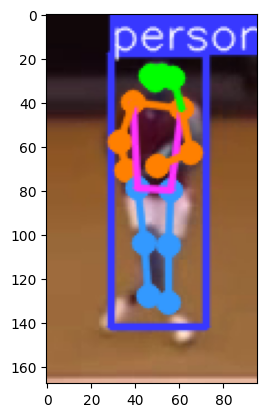

In [3]:
import matplotlib.pyplot as plt
plt.imshow(annot_fram)